
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Introduction</div>

According to the article "Air pollution: The silent killer called PM2.5" (https://www.mcgill.ca/newsroom/channels/news/air-pollution-silent-killer-called-pm25-329428)

"Among the different types of air pollution, PM2.5 kills the most people worldwide. It consists of particles smaller than approximately 2.5 microns – so small that billions of them can fit inside a red blood cell.

More than half of the world urgently needs protection in the form of adequate PM2.5 ambient air quality standards. Putting these standards in place everywhere will save countless lives. And where standards are already in place, they should be harmonized globally."

So it is very important for us to predict and prevent PM2.5. In thia notebook, I tried to find prediction model by NLP, LSTM, GRU AND RNN.

<a id="2"></a>
### <div style="text-align: left; background-color: #AA4EB8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORTING LIBRARIES📚</div>

In [1]:
# 1.0 Call libraries
# 1.1 Keras model components
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# 1.3 Data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os,time, gc, pathlib

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">LOADING DATA👓</div>

In [2]:
dataframe=[]
for dirname, _, filenames in os.walk ('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname,filename))
        path_file=os.path.join(dirname,filename)
        print(path_file)
        df=pd.read_csv(path_file,index_col=None, header=0)
        dataframe.append(df)
pollution_data=pd.concat(dataframe)

/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Guanyuan_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Wanliu_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Tiantan_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Shunyi_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Changping_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Dingling_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_Huairou_20130301-20170228.csv
/kaggle/input/beijing-multisite-airquality-data-set/PRSA_Data_

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Data pre-processing </div>

In [3]:
pollution_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [4]:
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [5]:
#Checking the null
pollution_data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
#checking the nan
pollution_data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
#Dropping the nan rows
pollution_data.dropna(inplace=True)

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">DATA ANALYSIS & VISUALIZATION</div>

### <div style="text-align: left; background-color: #FF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series SO2 by year</div>

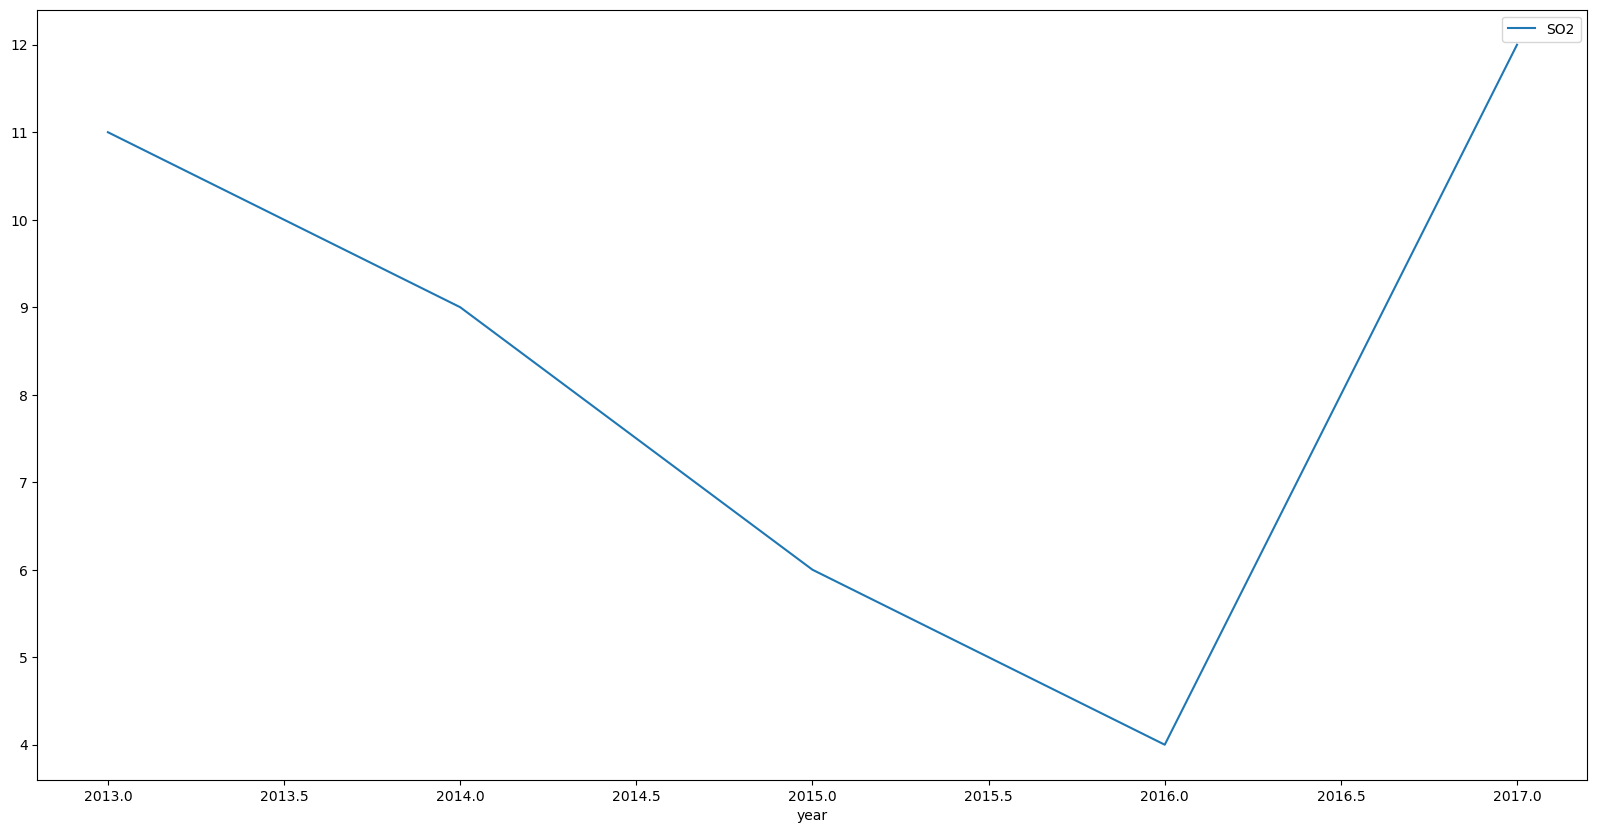

In [8]:
pollution_data[['SO2','year']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10));

### <div style="text-align: left; background-color: #EF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series NO2 by year</div>

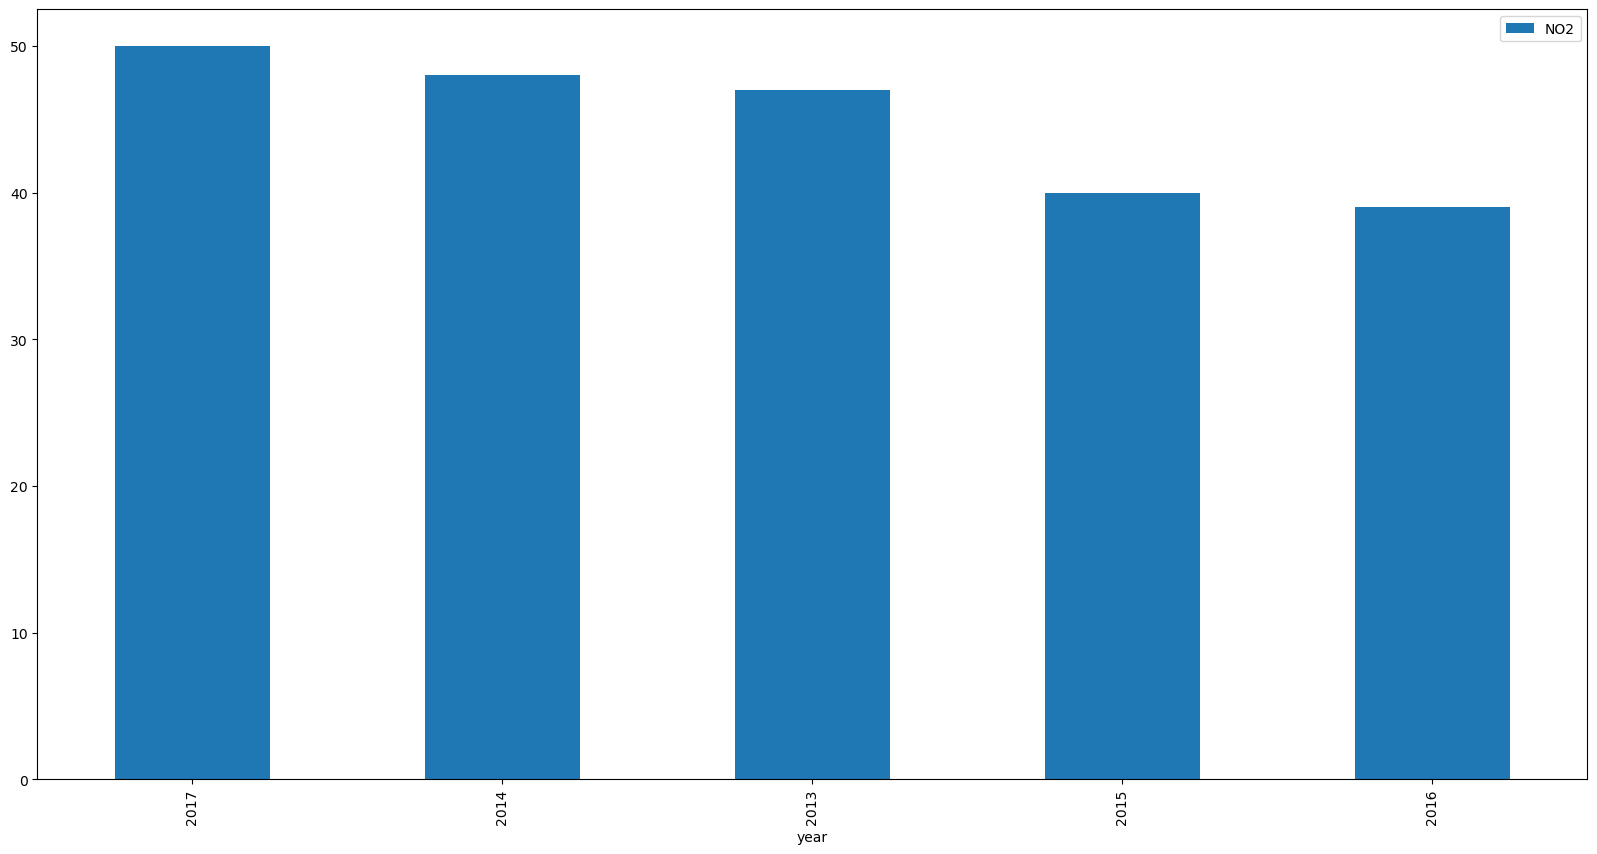

In [9]:
pollution_data[['NO2', 'year']].groupby(['year']).median().sort_values("NO2", ascending = False).plot.bar(figsize=(20,10));

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series CO by year</div>

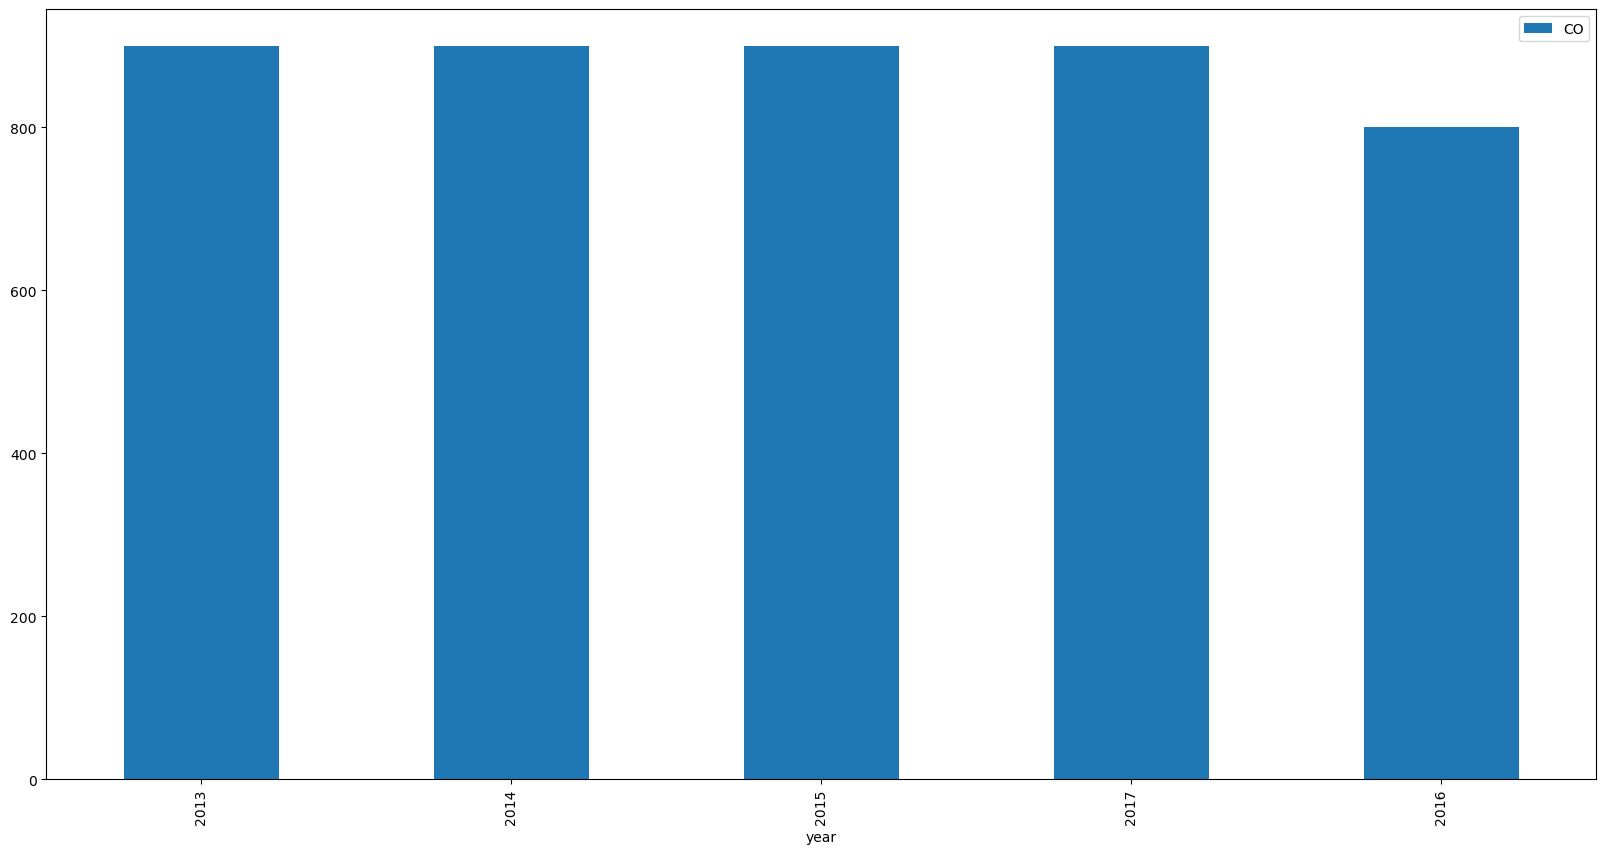

In [10]:
pollution_data[['CO', 'year']].groupby(['year']).median().sort_values("CO", ascending = False).plot.bar(figsize=(20,10));

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by year</div>

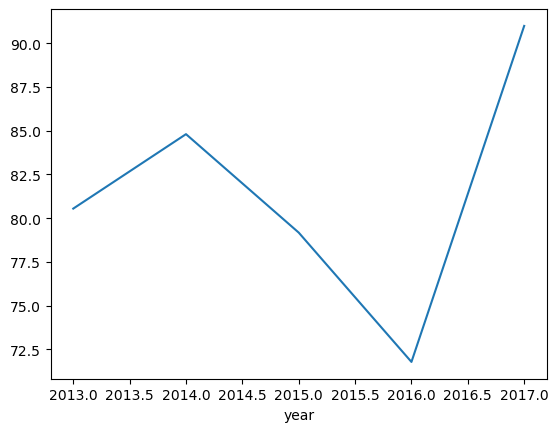

In [11]:
pollution_data.groupby('year')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">BOX plot PM2.5 by year</div>

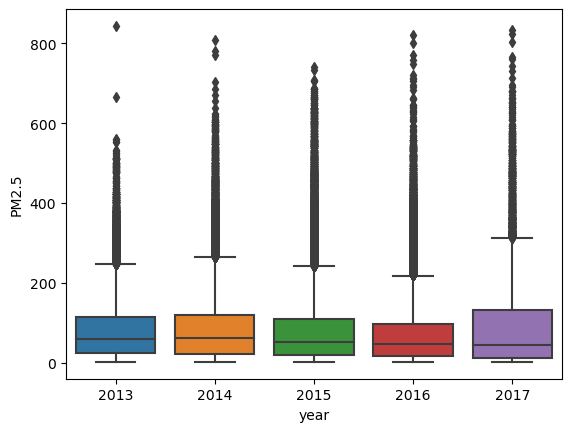

In [12]:
df_year=pollution_data.loc[:,['year','PM2.5']]
sns.boxplot(x='year', y='PM2.5',data=df_year);

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by month</div>

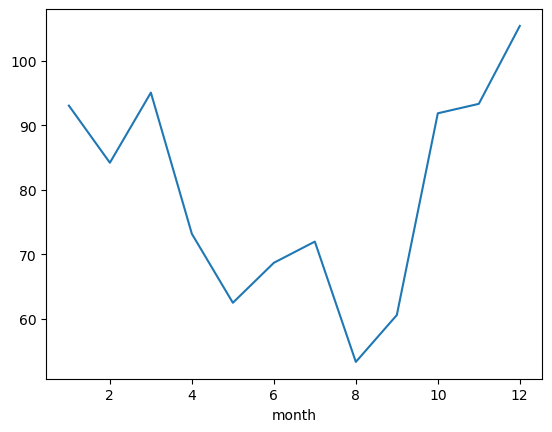

In [13]:
pollution_data.groupby('month')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by day</div>

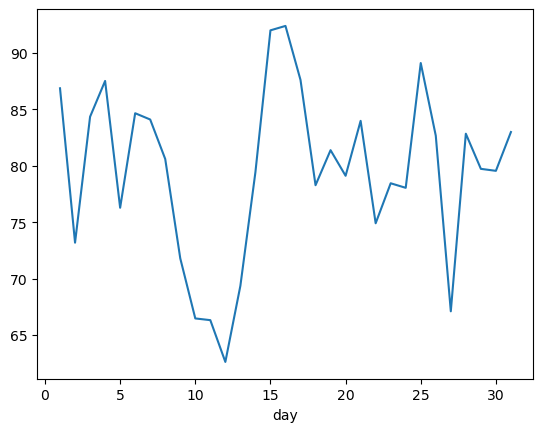

In [14]:
pollution_data.groupby('day')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by hour</div>

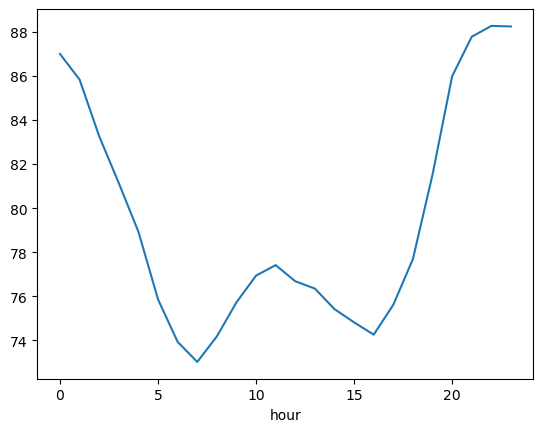

In [15]:
pollution_data.groupby('hour')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by pres</div>

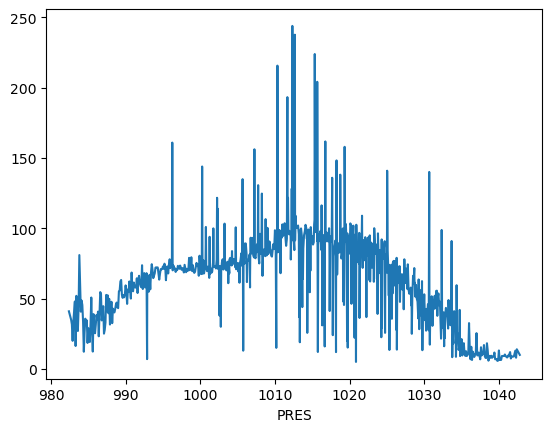

In [16]:
pollution_data.groupby('PRES')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Time series PM2.5 by temp</div>

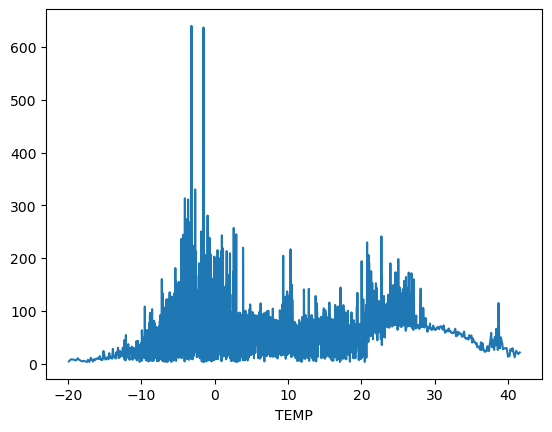

In [17]:
pollution_data.groupby('TEMP')['PM2.5'].mean().plot();

### <div style="text-align: left; background-color: #AF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px"> Heatmap Feature importance</div>

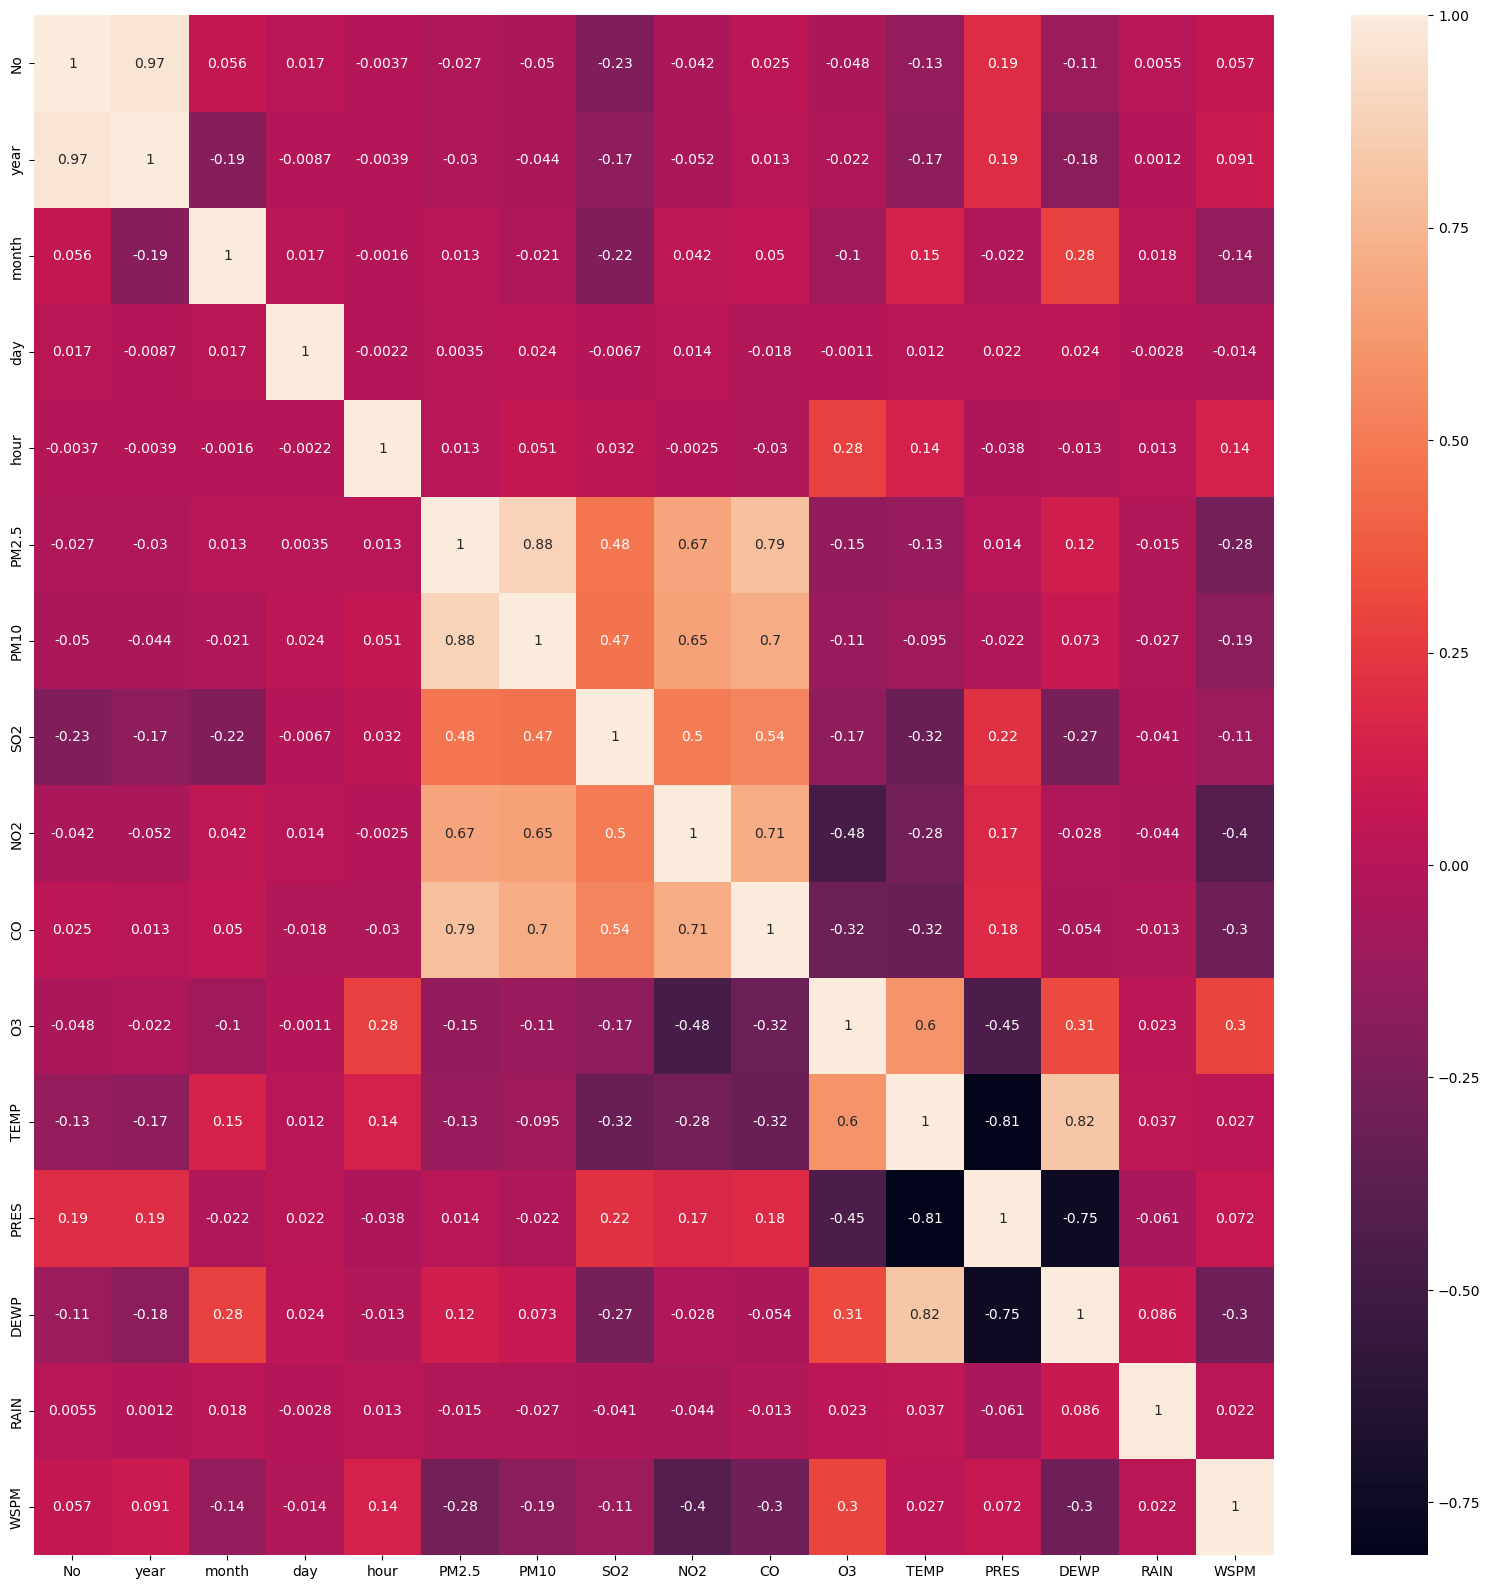

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(pollution_data.corr(), annot=True);

### <div style="text-align: left; background-color: #FF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">LSTM Model</div>

In [19]:
target=pollution_data.pop('PM2.5')


### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Target transformation </div>

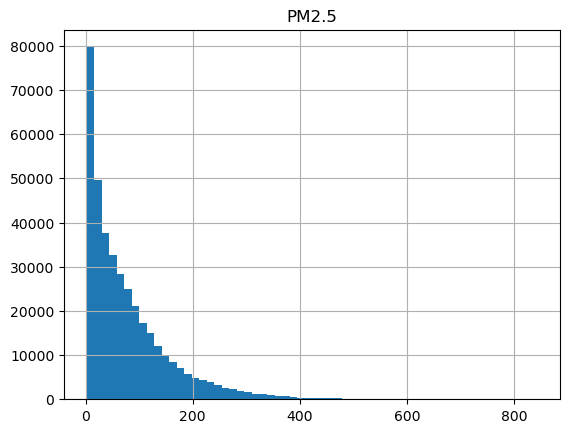

In [20]:
pd.DataFrame(target).hist(bins = 60) ;

In [21]:
#Applying log on target data
target = np.log( target + 1) 

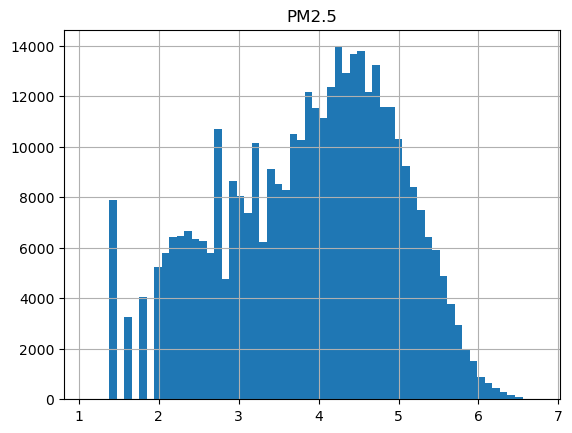

In [22]:
#Transforming target data
pd.DataFrame(target).hist(bins = 60) ;

In [23]:
#Trnasforming data
dataset  = target.values
training_data_len = math.ceil(len(dataset)/90)
training_data_len

4247

In [24]:
#Applying scaler
sc = MinMaxScaler(feature_range=(-1, 1))
scaled_data = sc.fit_transform(target.values.reshape(-1,1))

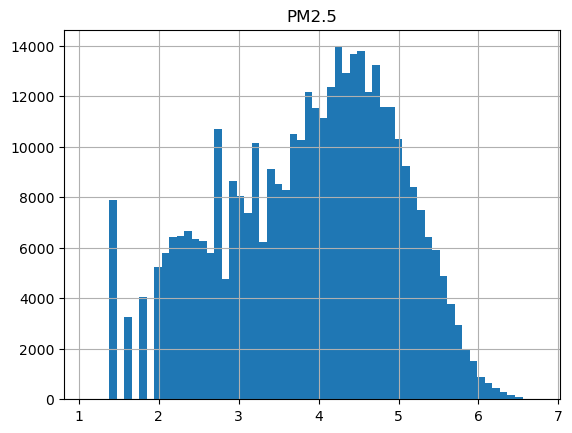

In [25]:
#Plotting target data
pd.DataFrame(target).hist(bins=60);

In [26]:
#Scaling up the data
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [27]:
#train and test data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4187, 60, 1)

In [28]:
# 2.0 Build model now
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(units=50, return_sequences =True))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

In [29]:
# 2.1 Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


### <div style="text-align: left; background-color: #FF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Compile model</div>

In [30]:
model.compile(optimizer='adam', loss='mse')

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Training Model </div>

In [31]:
history=model.fit(x_train,y_train, batch_size=1, epochs=5)

Epoch 1/5
4187/4187 [==============================] - 142s 33ms/step - loss: 0.0190
Epoch 2/5
4187/4187 [==============================] - 138s 33ms/step - loss: 0.0147
Epoch 3/5
4187/4187 [==============================] - 138s 33ms/step - loss: 0.0142
Epoch 4/5
4187/4187 [==============================] - 134s 32ms/step - loss: 0.0143
Epoch 5/5
4187/4187 [==============================] - 133s 32ms/step - loss: 0.0138


In [32]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
print((len(test_data)))
num = 60
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])


377981


In [33]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Prediction </div>

In [34]:
# 6.2 Predict now
pred = model.predict(x_test[:30000])
predictions = sc.inverse_transform(pred)

938/938 [==============================] - 20s 20ms/step


In [35]:
train = target[:training_data_len]
valid = target[training_data_len:]
valid["Predictions"] = predictions
valid

4819                                                    4.488636
4820                                                     4.51086
4821                                                     4.51086
4822                                                    4.532599
4823                                                    4.543295
                                     ...                        
35060                                                   2.944439
35061                                                   3.178054
35062                                                   3.178054
35063                                                   3.433987
Predictions    [[4.493191], [4.5569444], [4.576249], [4.56866...
Name: PM2.5, Length: 377922, dtype: object

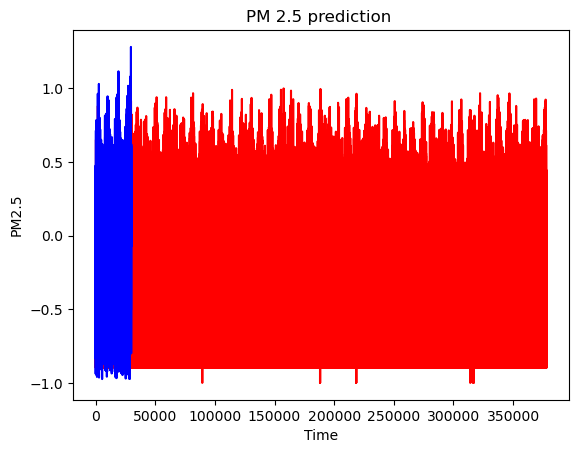

In [36]:
real_PM25_data = test_data
plt.plot(real_PM25_data, color='red', label = "Real PM 2.5");
plt.plot(pred, color = 'blue', label = "predicted PM2.5") ;
plt.title("PM 2.5 prediction ") ;
plt.xlabel("Time") ;
plt.ylabel("PM2.5");
plt.show() ;

### <div style="text-align: left; background-color: #FF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">GRU Model</div>

In [37]:

# 4.0 Build model now
gru_model = Sequential()
gru_model.add(tf.keras.Input(shape=(x_train.shape[1],1)))
gru_model.add(
          tf.keras.layers.GRU(
                               60
                              )
         )

In [38]:
#summary of the model
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60)                11340     
                                                                 
Total params: 11,340
Trainable params: 11,340
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 4.1 Output layer
gru_model.add(tf.keras.layers.Dense(1))

# 4.2 How does model look like?
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60)                11340     
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 4.3 Compile the model
gru_model.compile(optimizer=RMSprop(), loss='mae')

In [41]:
#Train the model
history = gru_model.fit(x_train,y_train, batch_size=1, epochs=2)

Epoch 1/2
4187/4187 [==============================] - 69s 16ms/step - loss: 0.0751
Epoch 2/2
4187/4187 [==============================] - 70s 17ms/step - loss: 0.0709


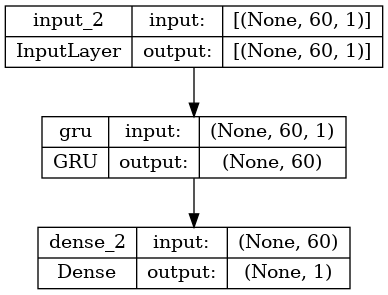

In [42]:
#Plotting the GRU model
tf.keras.utils.plot_model(
                         gru_model,
                          show_shapes=True
                          )

### <div style="text-align: left; background-color: #AA4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">RNN Model</div>

In [43]:
# 3.0 Build model now
rnn_model=tf.keras.Sequential()
rnn_model.add(tf.keras.Input(shape=(x_train.shape[1],1)))
rnn_model.add(tf.keras.layers.SimpleRNN
                    (
                      60,                      # Neurons at the output
                      return_sequences = False # Make it True
                                               # And add layer #4.4
                    )
          )


In [44]:
# 3.1 Add classification layer:
rnn_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [45]:
#Summary of the model
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60)                3720      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 4.8 Compile model
rnn_model.compile(
               loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['mae']
              )

In [47]:
# 4.9  Tensorboard callback
# We will use TensorBoard to visualize metrics 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


### <div style="text-align: left; background-color: #FF4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Train model</div>

In [48]:
history = model.fit(x_train,
                    y_train,
                    batch_size = 32,             # Number of samples per gradient update
                    validation_split = 0.2,      # Fraction of training data to be used as validation data
                    epochs = 1,
                    shuffle = True,              # Shuffle training data before each epoch
                    callbacks=[tensorboard_callback],
                    verbose =1
                    )

105/105 [==============================] - 13s 89ms/step - loss: 0.0137 - val_loss: 0.0099


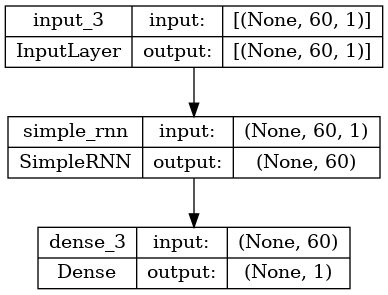

In [49]:
#Plotting the RNN model
tf.keras.utils.plot_model(
                         rnn_model,
                          show_shapes=True
                          )

### <div style="text-align: left; background-color: #FF4fD8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Embedding Model</div>

In [50]:
# 4.0 Getting embeddings module.
# 4.1 Add an embedding layer:
embedding_size = 60
model = Sequential()
model.add(tf.keras.Input(shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Embedding(input_dim = 100,               # Vocabulary size of 12
                    output_dim = embedding_size,  # Vector size of 3
                    input_length = 5,             # A category, such as: ['sharp knife' ] 
                                                  # would have input_length of 2. But, 
                                                  # a category such as: ['knife'] would have
                                                  #  input_length of 1.
                    name="embedding"              # Layer name. We will later access it by this name
                   )
         )
model.add(tf.keras.layers.Flatten())                        # Needs flattening as output is (embedding_size,1)
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [51]:
# 4.2 Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 1, 60)         6000      
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                180050    
                                                                 
 dense_5 (Dense)             (None, 15)                765       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 186,831
Trainable params: 186,831
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 4.3 compiling the model
model.compile(loss = "mse",
              optimizer = "adam"
              )

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Train model </div>

In [53]:
# 4.3 train the model
history=model.fit(x_train,y_train, batch_size=1, epochs=1
         )

4187/4187 [==============================] - 19s 4ms/step - loss: 0.1063


In [54]:
# 5.0 Get embeddings layer weights"

# 5.0.1 First get the 'layer' object
e_layer = model.get_layer('embedding')


# 5.0.2 Then get e_layer's attributes
output_embeddings = e_layer.get_weights()

In [55]:
# 5.0.3
type(output_embeddings)     # It is a list that contains one array
print("\n=====")
print(len(output_embeddings))  # 1


=====
1


In [56]:
# 6.1
output_embeddings[0]     # Our weights array
print("\n============")
output_embeddings[0].shape  # (12,5)

(100, 60)

In [57]:
# 6.2 Transform array to dataframe
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.009311,-0.002634,-0.015422,0.014516,0.013470,-0.011674,-0.003005,-0.000329,-0.020370,-0.002774,...,0.013812,-0.000544,0.007648,-0.003535,-0.017904,0.026495,-0.002240,0.007632,-0.000303,0.017200
1,0.030296,-0.012736,0.007043,0.013336,-0.012042,0.004749,0.020104,0.008395,0.008115,-0.032208,...,-0.015118,-0.035687,-0.036874,0.024294,0.031815,-0.044985,-0.018734,-0.048828,0.013028,-0.041212
2,0.004593,0.003846,-0.034038,-0.038956,-0.013085,0.025456,-0.046486,-0.039581,0.019662,0.005170,...,-0.034405,0.020116,0.009331,0.049347,-0.024194,-0.030253,0.024739,-0.022874,-0.009368,-0.047795
3,0.023991,0.043054,0.021483,0.021789,-0.027558,0.025831,0.038588,0.041522,-0.037118,0.013406,...,-0.034997,0.019763,0.023360,0.046046,0.015691,0.012623,-0.013238,0.038927,0.023970,0.046078
4,-0.027079,0.034188,-0.032479,-0.011297,-0.009062,0.048653,-0.000352,0.046176,0.000505,-0.009180,...,-0.011302,0.023256,0.022022,-0.018954,-0.026128,0.003415,-0.039391,-0.046548,0.041112,-0.026630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.028138,-0.009139,-0.011465,0.040404,-0.029019,-0.005728,-0.020785,-0.014087,0.004692,0.039402,...,-0.040782,-0.022283,0.045616,-0.026589,0.035220,-0.006785,-0.008635,0.031380,-0.000848,-0.014557
96,0.005653,0.013225,-0.005730,0.002747,-0.003064,0.041541,0.029367,0.031044,0.023480,0.019379,...,-0.015251,0.013259,0.012715,0.041880,-0.031710,0.008415,0.042497,-0.018906,0.045738,0.004104
97,0.038619,-0.047874,0.009848,0.042007,-0.027195,-0.000244,-0.044606,0.025432,0.038332,-0.031356,...,0.038654,0.010997,-0.049188,-0.004073,-0.034402,0.045908,0.046491,-0.007569,0.001849,0.040779
98,0.006498,0.021760,0.030255,-0.011237,0.047514,-0.043342,0.006294,0.031003,-0.017158,-0.019541,...,-0.039942,0.028461,0.010014,-0.029351,0.005435,0.029918,0.031556,-0.035179,0.040833,0.021609


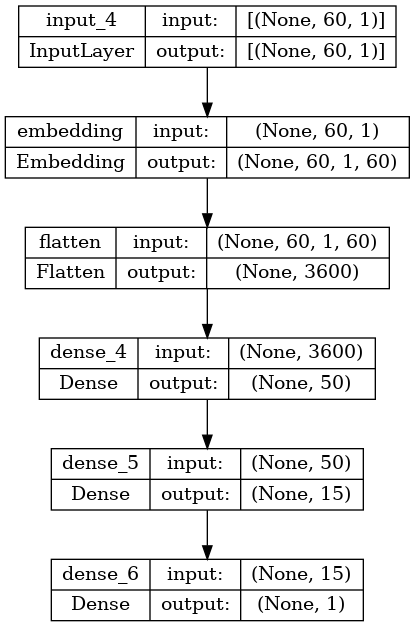

In [58]:
#Plot RNN model
tf.keras.utils.plot_model(
                         model,
                          show_shapes=True
                          )